## Project Task: week 1
### 1. Import datasets

In [279]:
# import libraries
from sqlalchemy import text
from pandasql import sqldf
import numpy as np
import pandas as pd
import random
from math import *

import operator
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [280]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [281]:
# train dataset info
print('dataset length', len(df_train))
print('dataset columns length', len(df_train.columns))
print('dataset column', df_train.columns)

dataset length 27321
dataset columns length 80
dataset column Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',


In [282]:
# test dataset info
print('dataset length', len(df_test))
print('dataset columns length', len(df_test.columns))
print('dataset column', df_test.columns)


dataset length 11709
dataset columns length 80
dataset column Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',


In [283]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [284]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [285]:
df_train.describe()
# here,
# count = no of non-null values
# std = standard deviation

# 25%(1st quartile), 50(2nd Quartile), 75%(3rd quartile), 
# Quartiles are commonly used in statistics and data analysis to understand the distribution of a 
# dataset and to identify outliers or extreme values.
# They provide a way to summarize the spread of the data and help in comparing different parts of the dataset.

# When the set of observations are arranged in ascending order the quartiles are represented as, 
# First Quartile(Q1) = ((n + 1)/4)th Term. if n=99, Q1 = 25
# Second Quartile(Q2) = ((n + 1)/2)th Term. if n=99, Q2 = 50
# Third Quartile(Q3) = (3(n + 1)/4)th Term. if n=99, Q3 = 75


,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027488,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [286]:
df_test.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,...,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,...,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,...,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238819.000000,NaN,140.0,29.000000,13.000000,25570.000000,404.000000,33.919813,-97.816561,1.718660e+06,...,36.729210,34.750000,21.270920,363.225840,1499.000000,0.492500,0.422020,0.020890,0.004500,0.064590
50%,257651.000000,NaN,140.0,61.000000,28.000000,47362.000000,612.000000,38.618093,-86.643344,4.835000e+06,...,40.196960,40.333330,22.472990,509.103610,2099.000000,0.687640,0.525270,0.038680,0.013870,0.094350
75%,276300.000000,NaN,140.0,109.000000,42.000000,77406.000000,787.000000,41.232973,-79.697311,3.204540e+07,...,43.496490,45.333330,23.549450,685.883910,2800.000000,0.815235,0.605660,0.065340,0.027910,0.128400
max,294333.000000,NaN,140.0,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


In [287]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [288]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

### 2.Figure out the primary key and look for the requirement of indexing.

In [289]:
#UID is unique value for each raw in the train and test dataset. Let's create an index using UID
df_train.set_index(keys=['UID'],inplace=True)
df_test.set_index(keys=['UID'],inplace=True)

In [290]:
# UID is now index
df_train.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [291]:
missing_list_train_number=df_train.isnull().sum()

missing_list_train = missing_list_train_number * 100/len(df_train)

missing_values_df_train = pd.DataFrame(
    missing_list_train, columns=['Percantage of missing values'])

missing_values_df_train.sort_values(
    by=['Percantage of missing values'], ascending=False, inplace=True)

missing_values_df_train = missing_values_df_train[missing_values_df_train['Percantage of missing values'] > 0][:10]
missing_values_df_train


,Percantage of missing values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
hc_sample_weight,2.196113
hc_mortgage_mean,2.097288
hc_mortgage_stdev,2.097288
hc_mortgage_sample_weight,2.097288
hc_mortgage_samples,2.097288


In [292]:
#missing values in test dataset
missing_list_test_number = df_test.isnull().sum()

missing_list_test = missing_list_test_number*100/len(df_test)
missing_list_test = pd.DataFrame(missing_list_test, columns=['Percantage of missing values'])
missing_list_test.sort_values(
    by=['Percantage of missing values'], inplace=True, ascending=False)
missing_list_test = missing_list_test[missing_list_test['Percantage of missing values'] > 0][:10]
missing_list_test


,Percantage of missing values
BLOCKID,100.000000
hc_samples,2.476727
hc_mean,2.476727
hc_median,2.476727
hc_stdev,2.476727
hc_sample_weight,2.476727
hc_mortgage_mean,2.288838
hc_mortgage_stdev,2.288838
hc_mortgage_sample_weight,2.288838
hc_mortgage_samples,2.288838


In [293]:
df_train.drop(columns=['BLOCKID'],inplace=True)
df_test.drop(columns=['BLOCKID'],inplace=True)

In [294]:
# get column with missing values
missing_train_columns = []
for column in df_train.columns:
    if (df_train[column].isnull().sum() != 0):
        missing_train_columns += [column]
print(len(missing_train_columns))

58


In [295]:
missing_test_columns = []
for column in df_test.columns:
    if df_test[column].isnull().sum() != 0:
        missing_test_columns += [column]
print(len(missing_train_columns))


58


In [296]:
#  columns are numeric, so fill missing value with mean
for column in df_train.columns:
    if column in missing_train_columns:
        df_train[column].replace(np.nan, df_train[column].mean(), inplace=True)

In [297]:
for column in df_test.columns:
    if column in missing_test_columns:
        df_test[column].replace(np.nan, df_test[column].mean(), inplace = True)

In [298]:
# check for missing values in dataset train and test
print('Null values in train dataset',df_train.isna().sum().sum())
print('Null values in test dataset', df_test.isna().sum().sum())


Null values in train dataset 0
Null values in test dataset 0


### Exploratory Data Analysis (EDA):

#### Perform debt analysis
1.Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [299]:
#To get the final dataframe with mortality percentage for each location
query = """select place,pct_own,second_mortgage,lat,lng from df_train 
        where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"""

pysqldf = lambda q: sqldf(q, globals())
df_train_location_mort_pct = pysqldf(query)


In [300]:
df_train_location_mort_pct

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434
...,...,...,...,...,...
2495,Marina Del Rey,0.44682,0.06818,33.983204,-118.466139
2496,Raleigh City,0.12827,0.06818,35.757135,-78.704288
2497,Lochearn,0.84707,0.06815,39.353095,-76.733315
2498,Manteca City,0.67116,0.06814,37.732143,-121.242902


In [301]:
import plotly.express as px
import plotly.graph_objects as go

In [302]:
fig = go.Figure(data=go.Scattergeo(
    lat=df_train_location_mort_pct['lat'],
    lon=df_train_location_mort_pct['lng'])
)
fig.update_layout(
    geo=dict(
        scope='north america',
        showland=True,
        landcolor="rgb(123, 456, 789)",
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        resolution=50,
        projection=dict(
            type='conic conformal',
            rotation_lon=-100
        ),
        lonaxis=dict(
            showgrid=True,
            gridwidth=0.5,
            range=[-140.0, -55.0],
            dtick=5
        ),
        lataxis=dict(
            showgrid=True,
            gridwidth=0.5,
            range=[20.0, 60.0],
            dtick=5
        )
    ),title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')


#### Use the following bad debt equation:

Bad Debt = P (Second Mortgage ∩ Home Equity Loan) 

Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

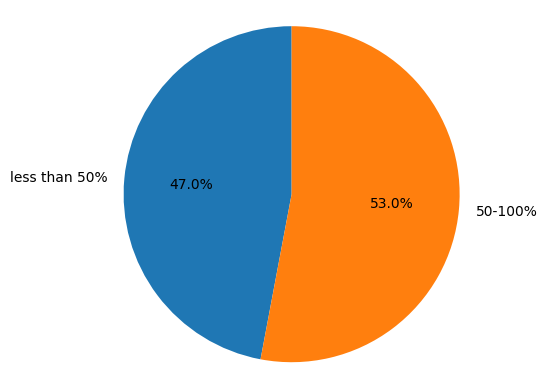

In [303]:
df_train['bad_debt'] = df_train['second_mortgage'] + \
    df_train['home_equity'] - df_train['home_equity_second_mortgage']
bins = [0,0.10,1]
labels = ['less than 50%', "50-100%"]
df_train['bins'] = pd.cut(df_train['bad_debt'], bins=bins, labels=labels)
pie_chart_data = df_train.groupby(['bins']).size()
pie_chart_data = pie_chart_data.astype(float)
pie_chart_data.plot(kind='pie', subplots=True,
                    startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

#### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [304]:
df_train['city'].unique()

array(['Hamilton', 'South Bend', 'Danville', ..., 'Blue Bell', 'Weldona',
       'Colleyville'], dtype=object)

In [305]:
cols = ['second_mortgage', 'home_equity', 'debt', 'bad_debt']
df_box_Danville = df_train.loc[df_train['city'] == 'Danville']
df_box_south_bend = df_train.loc[df_train['city'] == 'South Bend']
df_box_city = pd.concat([df_box_Danville, df_box_south_bend])
df_box_city.tail(4)


,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,bins
UID,,,,,,,,,,,,,,,,,,,,,
246462,140,141,18,Indiana,IN,South Bend,South Bend City,City,tract,46628,...,25.63221,128.17944,530.0,0.50604,0.20054,0.07046,0.04336,0.10840,0.00000,NaN
246489,140,141,18,Indiana,IN,South Bend,Notre Dame,City,tract,46616,...,12.37053,2881.42351,4401.0,0.34639,0.03487,0.00672,0.00000,0.01188,0.06481,less than 50%
246472,140,141,18,Indiana,IN,South Bend,South Bend City,City,tract,46613,...,21.64909,422.11912,1805.0,0.59951,0.33103,0.04514,0.04138,0.10157,0.08640,less than 50%
246445,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46628,...,24.80144,355.92421,1425.0,0.26048,0.40816,0.05714,0.02177,0.17279,0.13269,50-100%


<AxesSubplot: xlabel='second_mortgage', ylabel='city'>

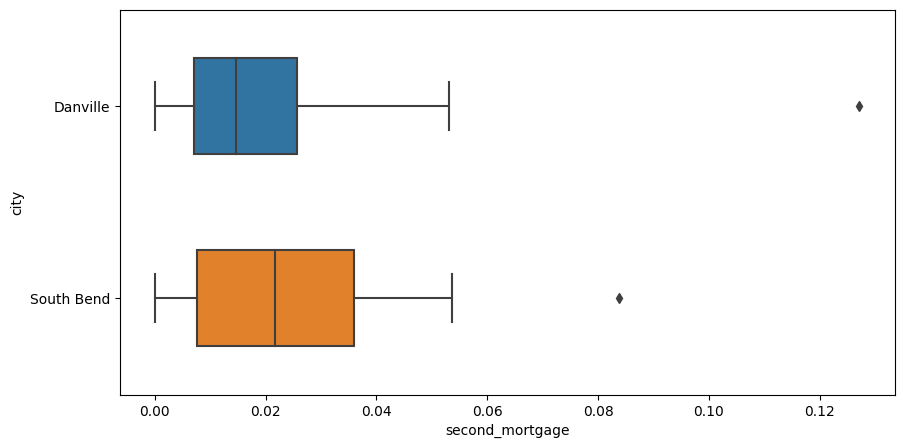

In [306]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city, x='second_mortgage', y='city', width=0.5)


<AxesSubplot: xlabel='home_equity', ylabel='city'>

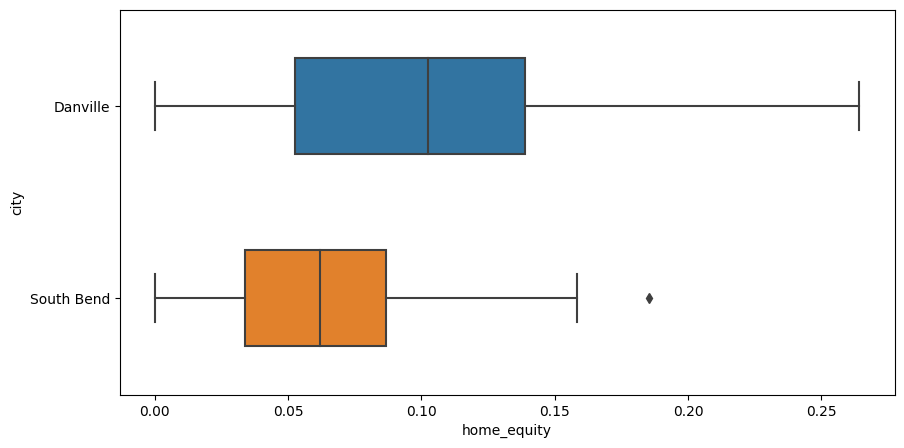

In [307]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city, x='home_equity', y='city', width=0.5)


<AxesSubplot: xlabel='debt', ylabel='city'>

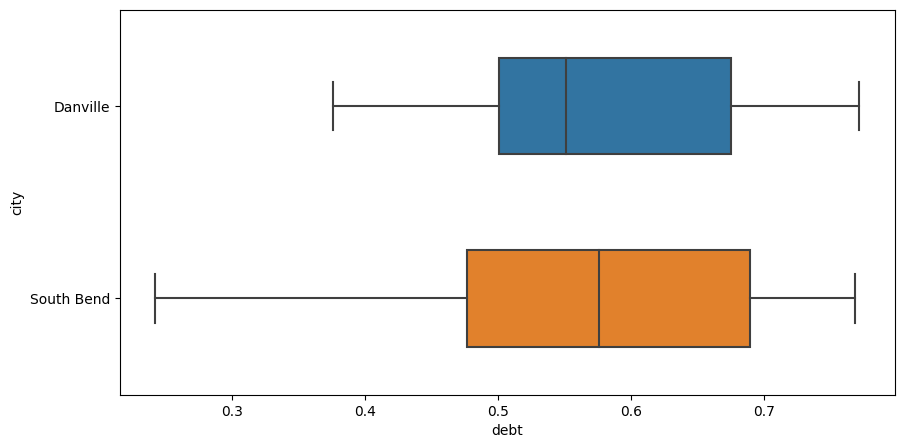

In [308]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city, x='debt', y='city', width=0.5)

<AxesSubplot: xlabel='bad_debt', ylabel='city'>

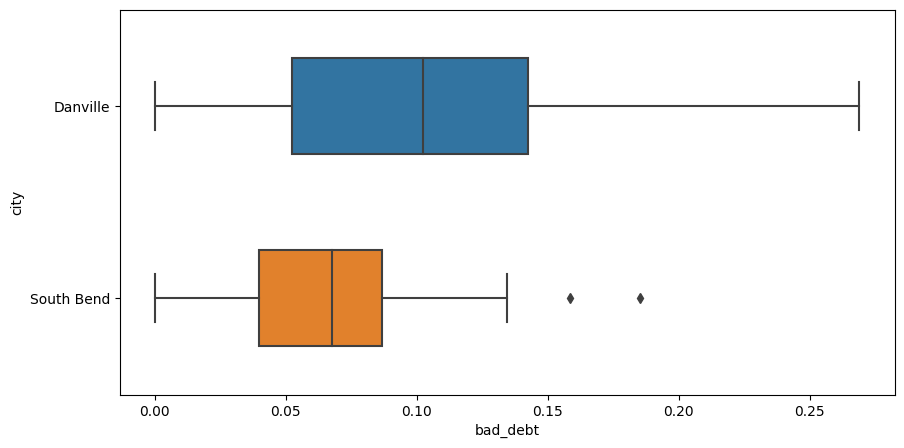

In [309]:
# df_box_Danville = df_train.loc[df_train['city'] == 'Manhattan']
# df_box_south_bend = df_train.loc[df_train['city'] == 'Hamilton']
# df_box_city = pd.concat([df_box_Danville, df_box_south_bend])
# df_box_city.tail(4)
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city, x='bad_debt', y='city', width=0.5)

#### Create a collated income distribution chart for family income, house hold income, and remaining income

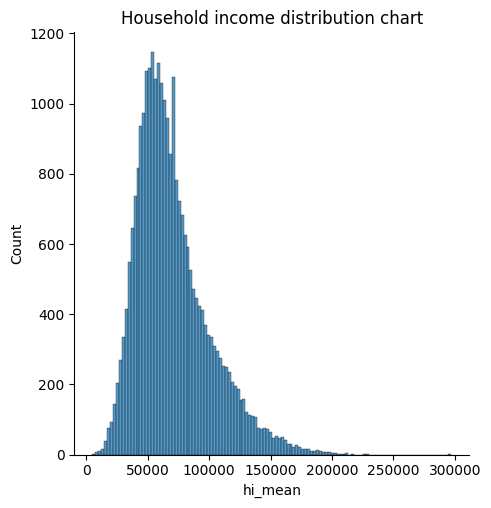

In [310]:
sns.displot(df_train['hi_mean'])
plt.title('Household income distribution chart')
plt.show()


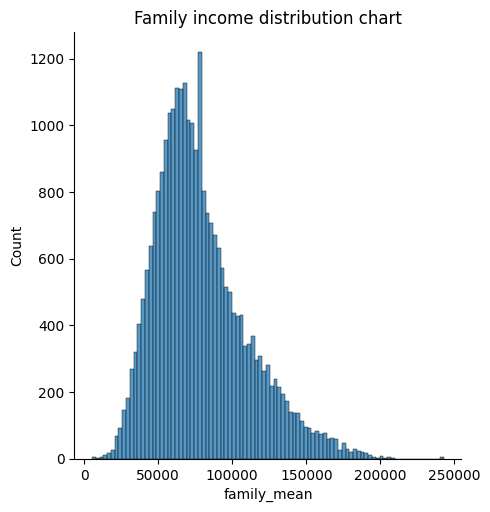

In [311]:
sns.displot(df_train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

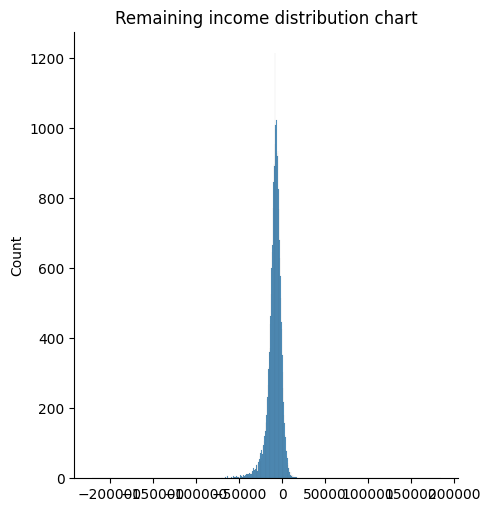

In [312]:
sns.displot(df_train['hi_mean']-df_train['family_mean'])
plt.title('Remaining income distribution chart')
plt.show()


### Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

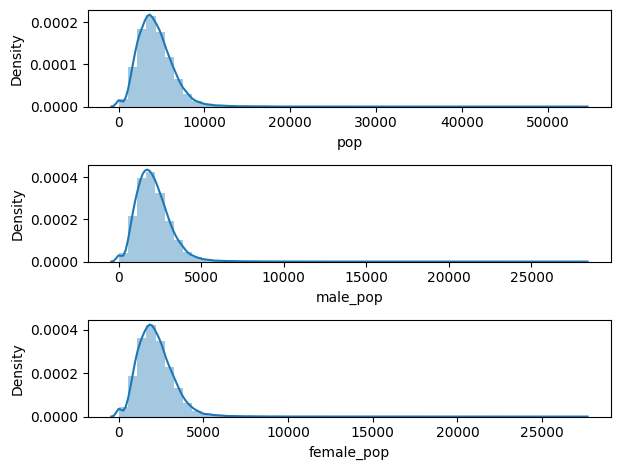

In [313]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=1,hspace=1)
plt.tight_layout()
plt.show()

#### Use pop and ALand variables to create a new field called population density

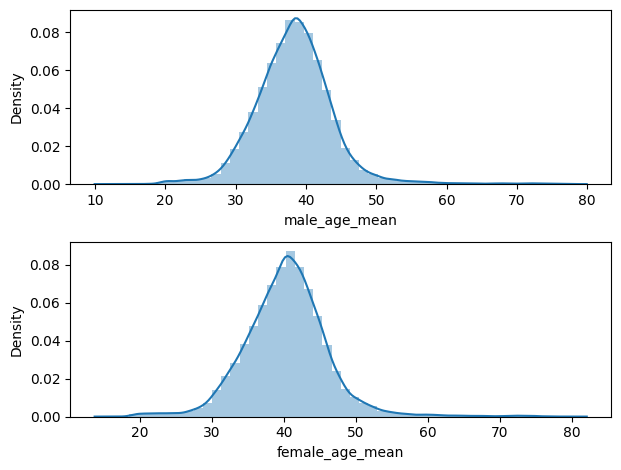

In [314]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'], ax=ax2)
plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()
plt.show()

#### Use pop and ALand variables to create a new field called population density


In [315]:
df_train['pop_density'] = df_train['pop']/df_train['ALand']
df_test['pop_density'] = df_test['pop']/df_test['ALand']


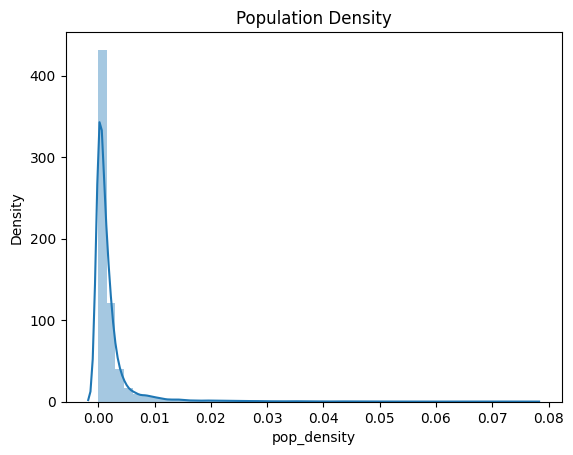

In [316]:
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show()

In [317]:
df_train['age_median'] = (
    df_train['male_age_median'] + df_train['female_age_mean'])/2
df_test['age_median'] = (
    df_test['male_age_median'] + df_test['female_age_mean'])/2


In [318]:
df_train[['male_age_median', 'female_age_median', 'male_pop', 'female_pop', 'age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.243145
246444,32.00000,37.58333,1349,1284,34.241955
245683,40.83333,42.83333,3643,3238,41.495715
279653,48.91667,50.58333,1141,1559,48.345965
247218,22.41667,21.58333,2586,3051,23.296800


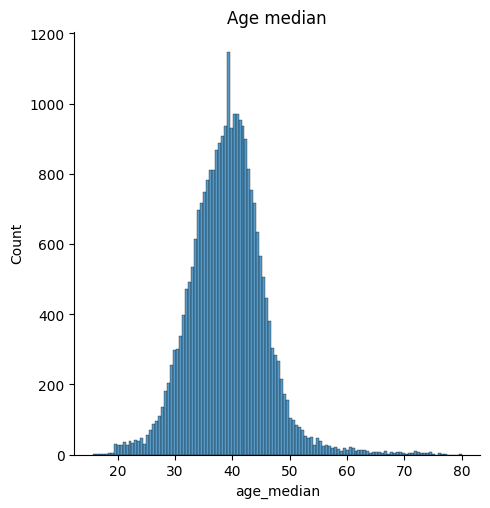

In [319]:
sns.displot(df_train['age_median'])
plt.title('Age median')
plt.show()

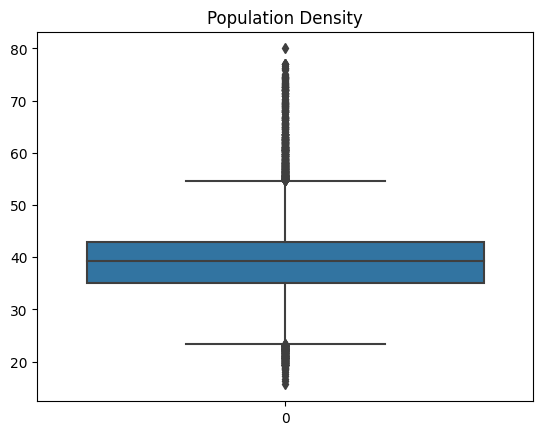

In [320]:
df_train_reset = df_train.reset_index(drop=True)
sns.boxplot(data=df_train_reset['age_median'])
plt.title('Population Density')
plt.show()


In [321]:
df_train[['age_median']].head()
df_train_reset[['age_median']].head()

,age_median
0,44.243145
1,34.241955
2,41.495715
3,48.345965
4,23.296800


#### Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [322]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [323]:
df_train['pop_bins'] = pd.cut(df_train['pop'],bins=5,labels=['very low','low','medium','high','very high'])
df_train[['pop','pop_bins']].tail()

,pop,pop_bins
UID,,
279212,1847,very low
277856,4155,very low
233000,2829,very low
287425,11542,low
265371,3726,very low


In [324]:
df_train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [325]:
df_train.groupby(by='pop_bins')[['married','separated', 'divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [326]:
df_train.groupby(by='pop_bins')[['married','separated', 'divorced']].agg(['mean','median'])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

#### Visualize the findings using appropriate chart type

<Figure size 800x400 with 0 Axes>

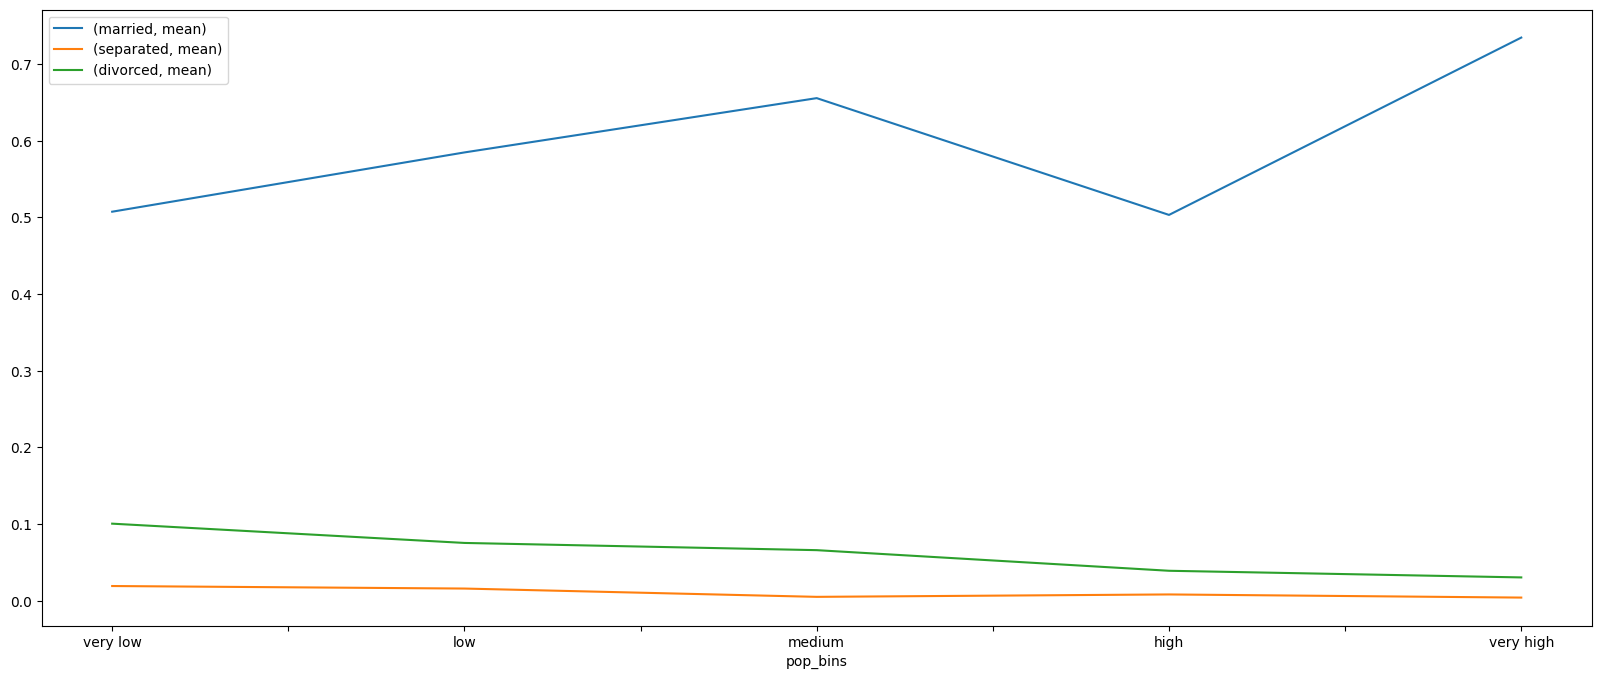

In [327]:
plt.figure(figsize=(8,4))
pop_bin_married = df_train.groupby(by='pop_bins')[['married', 'separated', 'divorced']].agg(['mean'])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

#### Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [328]:
rent_state_mean = df_train.groupby(by='state')['rent_mean'].agg(['mean'])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [329]:
income_state_mean = df_train.groupby(by='state')['family_mean'].agg(['mean'])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [330]:
rent_perc_of_income = rent_state_mean['mean'] / income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

In [331]:
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013358170721473864

#### Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [332]:
display(
    len(df_train.columns),
    df_train.columns,
)


83

Index(['SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_de

In [333]:
cor = df_train[['COUNTYID', 'STATEID', 'zip_code', 'type', 'pop', 'male_pop', 'female_pop', 'rent_mean','hi_mean', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

<AxesSubplot: >

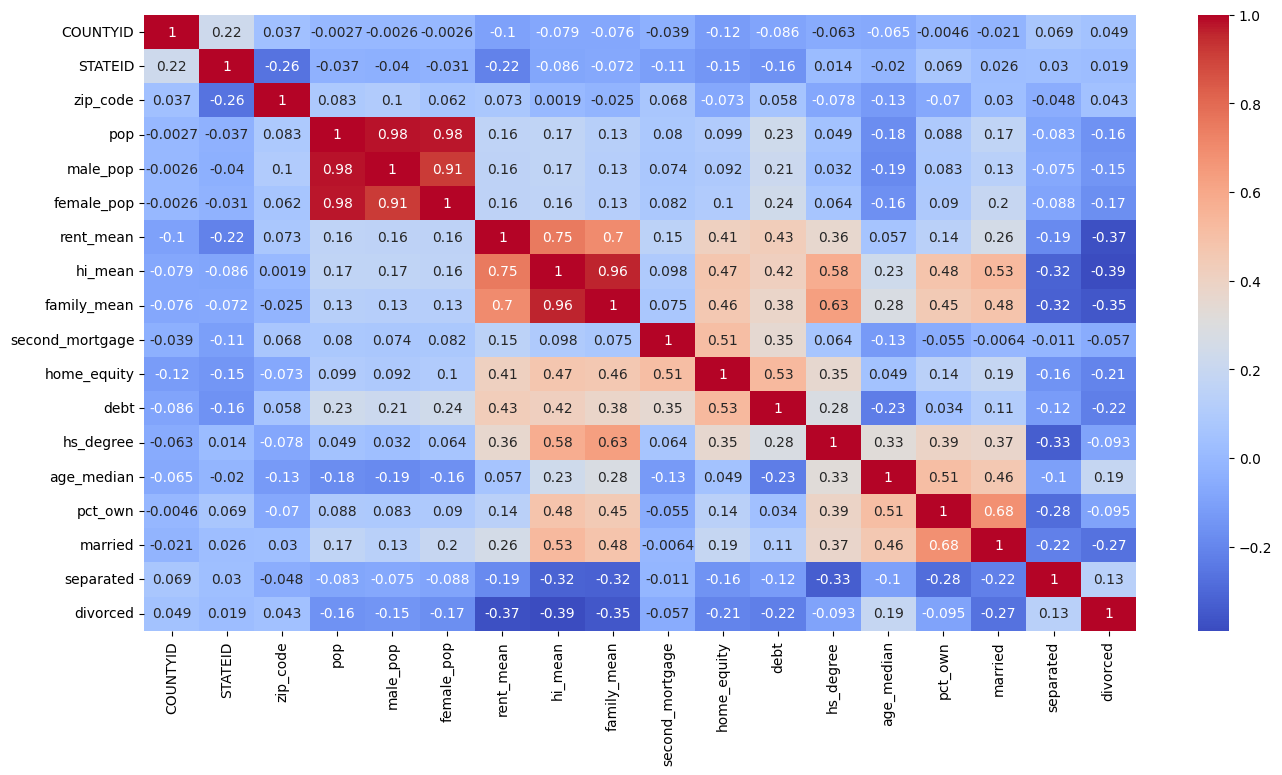

In [334]:
plt.figure(figsize=(16,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')

1.High positive correaltion is noticed between pop, male_pop and female_pop

2.High positive correaltion is noticed between rent_mean,hi_mean, family_mean,hc_mean

## Prroject Task: Week 2
### Data Pre-processing:

#### 
1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. Following are the list of latent variables:
1.Highschool graduation rates 
2.Median population age 
3.Second mortgage statistics 
4.Percent own 
5.Bad debt expense

In [335]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [356]:
# fa = FactorAnalyzer(n_factors=5)
# df_fa = df_train[['second_mortgage', 'age_median', 'hs_degree', 'bad_debt', 'pct_own']]
# # fa.fit_transform(df_fa.select_dtypes(exclude=('object', 'category')))
# # fa.loadings_
# # df_fa.head()
# df_train.select_dtypes(exclude=('object', 'category'))


,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,pop_density,age_median
UID,,,,,,,,,,,,,,,,,,,,,
267822,140,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,...,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,0.000026,44.243145
246444,140,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,...,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274,0.001687,34.241955
245683,140,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,...,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,0.000099,41.495715
279653,140,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,2700,...,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,0.002442,48.345965
247218,140,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,...,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426,0.002207,23.296800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,140,43,72,769,787,18.076060,-66.358379,6.970300e+05,0,1847,...,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683,0.00000,0.002650,42.199105
277856,140,91,42,19422,215,40.158138,-75.307271,5.077337e+06,11786,4155,...,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888,0.20908,0.000818,38.523010
233000,140,87,8,80653,970,40.410316,-103.814003,1.323262e+09,17577610,2829,...,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712,0.07857,0.000002,42.701090


### Data Modeling :

### Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.


In [357]:
df_train.columns

Index(['SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_de

In [359]:
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
df_train.replace(type_dict,inplace=True)
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [360]:
df_test.replace(type_dict,inplace=True)

In [361]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [362]:
x_train = df_train[feature_cols]
y_train = df_train['hc_mortgage_mean']

In [363]:
x_test = df_test[feature_cols]
y_test = df_test['hc_mortgage_mean']

In [364]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [365]:
x_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
267822,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.243145,0.79046,0.57851,0.01240,0.08770
246444,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.241955,0.52483,0.34886,0.01426,0.09030
245683,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.495715,0.85331,0.64745,0.01607,0.10657
279653,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,48.345965,0.65037,0.47257,0.02021,0.10106
247218,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,23.296800,0.13046,0.12356,0.00000,0.03109


In [367]:
# perform scaling to scal the wide spread data
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)


#### a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [368]:
linearg = LinearRegression()
linearg.fit(x_train_scaled, y_train) 

LinearRegression()

In [369]:
y_pred = linearg.predict(x_test_scaled)

In [379]:
print('R2 score =' , r2_score(y_test,y_pred))
print('RMSE =' , np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score = 0.733563582897282
RMSE = 323.86706661583895


#### Run another model at State level. There are 52 states in USA

In [386]:
state = df_train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [387]:
county = df_train['COUNTYID'].unique()
county


array([ 53, 141,  63, 127, 161,  79, 337,  45,  81,  37,  73,  51,  25,
       121,  99, 153,  19,  47, 209,   3,  97,  69,   7,  89,   1,   5,
        13,  86,   9, 101, 183,  67,  35, 115,  29,  17,  77,  65,  93,
        41, 109, 155,  59, 439, 133, 117, 215,  33,  71,  15,  11,  21,
       291,  31,  95,  75,  91, 163, 491,  27, 129, 113,  55, 111,  49,
        57, 105, 123, 241, 197, 290,  83, 157, 135,  20,  43,  39, 145,
       245, 329, 201, 191, 143,  61, 361, 103, 171, 227, 137, 119, 449,
       131,  85, 231, 221, 147, 740, 810, 189, 213, 670, 177, 257, 477,
       317, 159, 169, 173, 151,  87, 165, 355, 107, 453, 590, 650, 125,
       193,  23, 510, 267, 217, 710, 187, 175, 251, 167, 139, 347, 233,
       179, 479, 321, 313, 149, 339, 427, 680, 277, 325, 770,  78, 459,
       195, 820, 463, 700, 287, 600, 341, 150, 293, 375, 540, 185, 281,
       199, 181, 170, 423, 255, 219, 373, 481, 305, 261, 405, 122, 265,
        14, 282, 800, 349,  90, 401, 730, 247, 307, 379, 445, 38

In [395]:
for i in [20, 1, 45]:
    print('State ID:', i)
    x_train_nation = df_train[df_train['COUNTYID']==i][feature_cols]
    y_train_nation = df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation = df_test[df_test['COUNTYID'] == i][feature_cols]
    y_test_nation = df_test[df_test['COUNTYID'] == i]['hc_mortgage_mean']
    
    x_train_nation_scaled = sc.fit_transform(x_train_nation)
    x_test_nation_scaled = sc.fit_transform(x_test_nation)

    # Linear Regression Model Fitting and Prediction on Test Data for each State Nation
    linearg.fit(x_train_nation_scaled, y_train_nation)
    y_pred_nation = linearg.predict(x_test_nation_scaled)
    
    print('R2 score for state,',i,'is: ', r2_score(y_test_nation, y_pred_nation))
    print('RMSE for state,',i,'is: ', np.sqrt(mean_squared_error(y_test_nation, y_pred_nation)))
    print('/n')

State ID: 20
R2 score for state, 20 is:  0.6159961862169405
RMSE for state, 20 is:  303.52444592645077
/n
State ID: 1
R2 score for state, 1 is:  0.806659461170007
RMSE for state, 1 is:  310.8806144669729
/n
State ID: 45
R2 score for state, 45 is:  0.7961587628054542
RMSE for state, 45 is:  221.7003219906368
/n


In [397]:
error = y_test - y_pred
error

UID
255504    287.353443
252676    -70.112629
276314    198.411709
248614   -149.987541
286865     -3.917058
             ...    
238088    -58.798205
242811    -29.802031
250127   -130.819414
241096   -327.228558
287763    220.780390
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([6.000e+00, 3.000e+00, 3.100e+01, 8.560e+02, 7.893e+03, 2.565e+03,
        2.920e+02, 4.800e+01, 1.200e+01, 3.000e+00]),
 array([-2490.75954972, -1960.84670613, -1430.93386253,  -901.02101894,
         -371.10817534,   158.80466825,   688.71751185,  1218.63035544,
         1748.54319903,  2278.45604263,  2808.36888622]),
 <BarContainer object of 10 artists>)

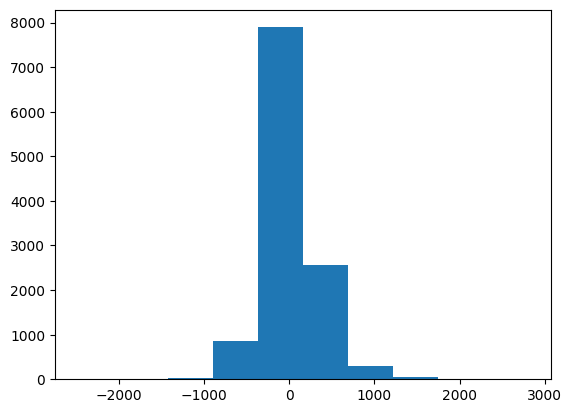

In [398]:
plt.hist(error)

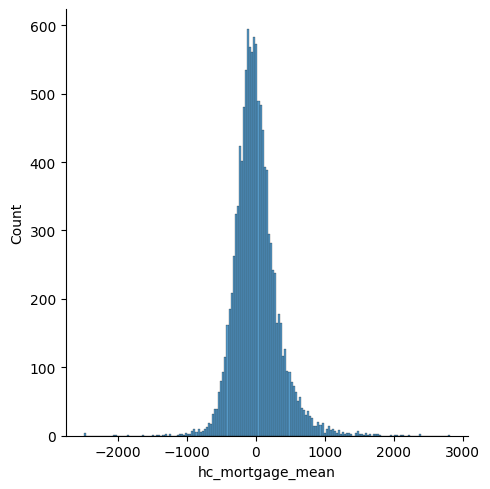

In [403]:
sns.displot(error)

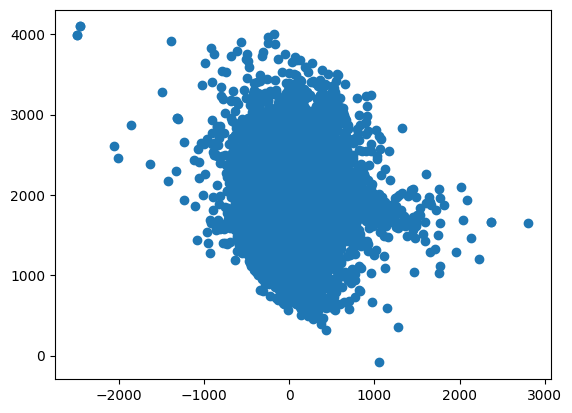

In [405]:
plt.scatter(error, y_pred)